####**t**-distributed **S**tochastic **N**eighbor **E**mbedding (t-SNE)
* Author : Sabari Murugan S
* GitHub : https://github.com/sabarimurugans47
* License: Educational use only. Please credit if reused.

**What is t-SNE? When to use?**
* Like PCA, t-SNE is a dimensionality reduction technique.
* To derive new features by capturing most variance is what PCA does.
* t-SNE used for visualizing high-dimensional data, if they form clusters, we can convert it to low-dimensional (2D,3D) to see the patterns they form.
* t-SNE captures only the local structure of the clusters.
* It computes gaussian distribution in high-dimensional, t-distribution in low dimensional, to avoid mismash of samples.
* Just for visualization, not for model training and feature reduction like PCA.
* Slower for large datasets.
* t-SNE uses similarity matrix for all samples. Compares each with every samples.
* To know about PCA (Concept + Math): https://github.com/sabarimurugans47/FUNDAMENTALS-FOR-ML-AND-DL/blob/main/11.PCA.ipynb



In [52]:
from sklearn.datasets import load_digits
digits=load_digits()
X=digits.data
y=digits.target

In [53]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [54]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [55]:
import pandas as pd
df=pd.DataFrame(X,y)

In [56]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [57]:
df[63].value_counts()

,count
63,
0.0,1687
1.0,29
2.0,10
3.0,10
5.0,8
6.0,7
8.0,6
7.0,5
15.0,5


In [58]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [59]:
df.shape

(1797, 64)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [61]:
X_scaled=scaler.fit_transform(X)

In [62]:
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [63]:
from sklearn.manifold import TSNE

In [79]:
tsne=TSNE(random_state=0,init='random',n_components=2)
%time embedded=tsne.fit_transform(X_scaled)

CPU times: user 12.9 s, sys: 19.1 ms, total: 12.9 s
Wall time: 13 s


In [65]:
tsne.get_params()

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'random',
 'learning_rate': 'auto',
 'max_iter': None,
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'metric_params': None,
 'min_grad_norm': 1e-07,
 'n_components': 3,
 'n_iter': 'deprecated',
 'n_iter_without_progress': 300,
 'n_jobs': None,
 'perplexity': 30.0,
 'random_state': 0,
 'verbose': 0}

In [66]:
embedded.shape

(1797, 3)

In [67]:
embedded[0],embedded[1]

(array([  7.7675505, -15.055803 ,   4.798643 ], dtype=float32),
 array([-9.555976 ,  1.2387174, -7.981162 ], dtype=float32))

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

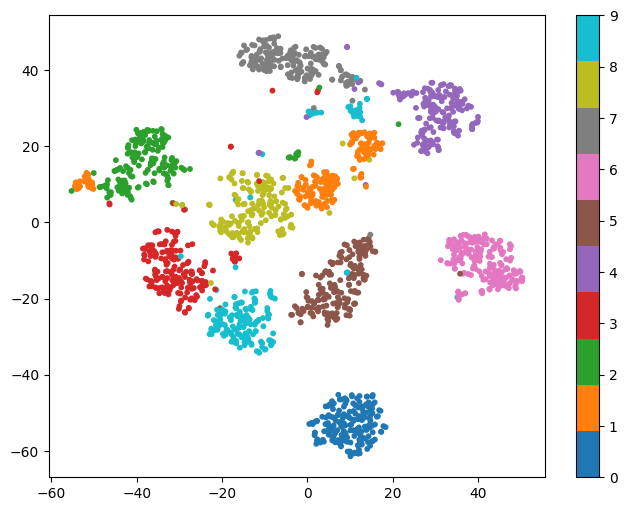

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(embedded[:,0], embedded[:,1], c=y, cmap='tab10', s=10)
plt.colorbar()
plt.show()

In [70]:
import numpy as np
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

####**What is UMAP? When to use?**
* Stands for **U**niform **M**anifold **A**pproximation and **P**rojection
* Unlike t-SNE, UMAP preserves local+global structure of samples.
* Like KNN, it finds nearest neighbors in high-dimensional space, for neighbors relationship.
* Then for low-dimensional space, it uses distribution-based visualisation.
* Faster for large datasets, better convergence than t-SNE.
* Just for EDA, visualization purposes, not for model training.
* Unlike t-SNE, UMAP uses similarity matrix based on `n_neighbors` we assign. Mostly as sparse matrix(0 to 1).

In [71]:
%time import umap

CPU times: user 0 ns, sys: 7 µs, total: 7 µs
Wall time: 9.3 µs


In [81]:
reducer=umap.UMAP(random_state=0,n_components=2)
reducer.get_params()

{'a': None,
 'angular_rp_forest': False,
 'b': None,
 'dens_frac': 0.3,
 'dens_lambda': 2.0,
 'dens_var_shift': 0.1,
 'densmap': False,
 'disconnection_distance': None,
 'force_approximation_algorithm': False,
 'init': 'spectral',
 'learning_rate': 1.0,
 'local_connectivity': 1.0,
 'low_memory': True,
 'metric': 'euclidean',
 'metric_kwds': None,
 'min_dist': 0.1,
 'n_components': 2,
 'n_epochs': None,
 'n_jobs': -1,
 'n_neighbors': 15,
 'negative_sample_rate': 5,
 'output_dens': False,
 'output_metric': 'euclidean',
 'output_metric_kwds': None,
 'precomputed_knn': (None, None, None),
 'random_state': 0,
 'repulsion_strength': 1.0,
 'set_op_mix_ratio': 1.0,
 'spread': 1.0,
 'target_metric': 'categorical',
 'target_metric_kwds': None,
 'target_n_neighbors': -1,
 'target_weight': 0.5,
 'tqdm_kwds': None,
 'transform_mode': 'embedding',
 'transform_queue_size': 4.0,
 'transform_seed': 42,
 'unique': False,
 'verbose': False}

In [77]:
%time fitted=reducer.fit_transform(X_scaled)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



CPU times: user 5.78 s, sys: 28 ms, total: 5.81 s
Wall time: 5.7 s


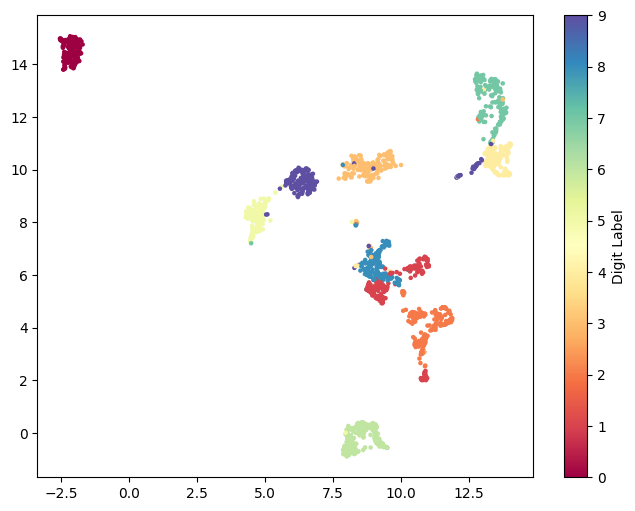

In [82]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(fitted[:, 0], fitted[:, 1], c=y, cmap='Spectral', s=5)
plt.colorbar(scatter, label="Digit Label")
plt.show()

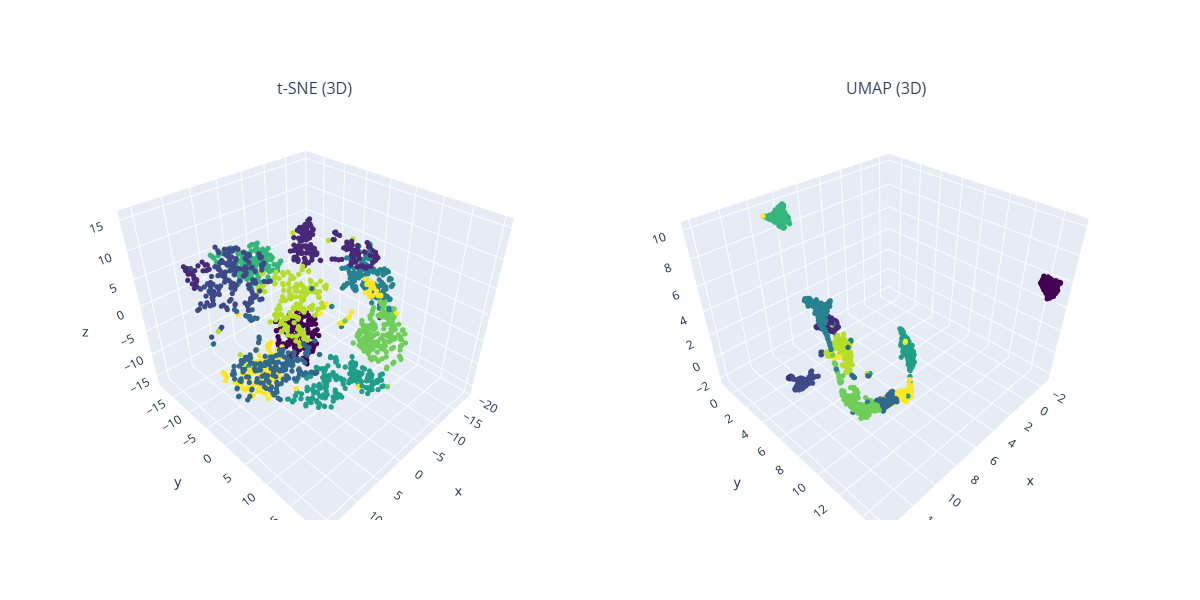

* Above plot is the 3d visualization of t-SNE and UMAP.
* UMAP separates clusters well on 3d space by preserving local and global structures than t-SNE.


---

